In [227]:
import numpy as np
import matplotlib.pyplot as plt

In [228]:
def get_Kt(Pt_tprev, Ht, Rt):
    return Pt_tprev@np.transpose(Ht)*np.linalg.inv( Ht@Pt_tprev@np.transpose(Ht)+Rt )

def get_Pt(dim, Kt, Ht, Pt_tprev):
    return (np.eye(dim)-Kt@Ht)@Pt_tprev

def get_Ptnext_t(At, Pt, Gt, Qt):
    return At@Pt@np.transpose(At) + Gt@Qt@np.transpose(Gt)

In [229]:
Rt = 1
dim = 2
At = np.array([[1, 1],
               [0, 1]])

Ht = np.array([[1, 0]])
Gt = np.eye(dim)

In [230]:
# t = 0
P0 = P1_0 = 10*np.eye(dim)

In [231]:
# t = 1
posteriori = [P0]
priori = [P0, P1_0] #pad

Pt_tprev = P1_0
for t in range(1, 30):
    Qt = 3 if (t % 2 == 0) else 1
    Kt = get_Kt(Pt_tprev, Ht, Rt)
    Pt = get_Pt(dim, Kt, Ht, Pt_tprev)
    Ptnext_t = get_Ptnext_t(At, Pt, Gt, np.eye(dim)*Qt)
    
    posteriori.append(Pt)
    priori.append(Ptnext_t)

    Pt_tprev = Ptnext_t


t = 30
Kt = get_Kt(Pt_tprev, Ht, Rt)
Pt = get_Pt(dim, Kt, Ht, Ptnext_t)
posteriori.append(Pt)

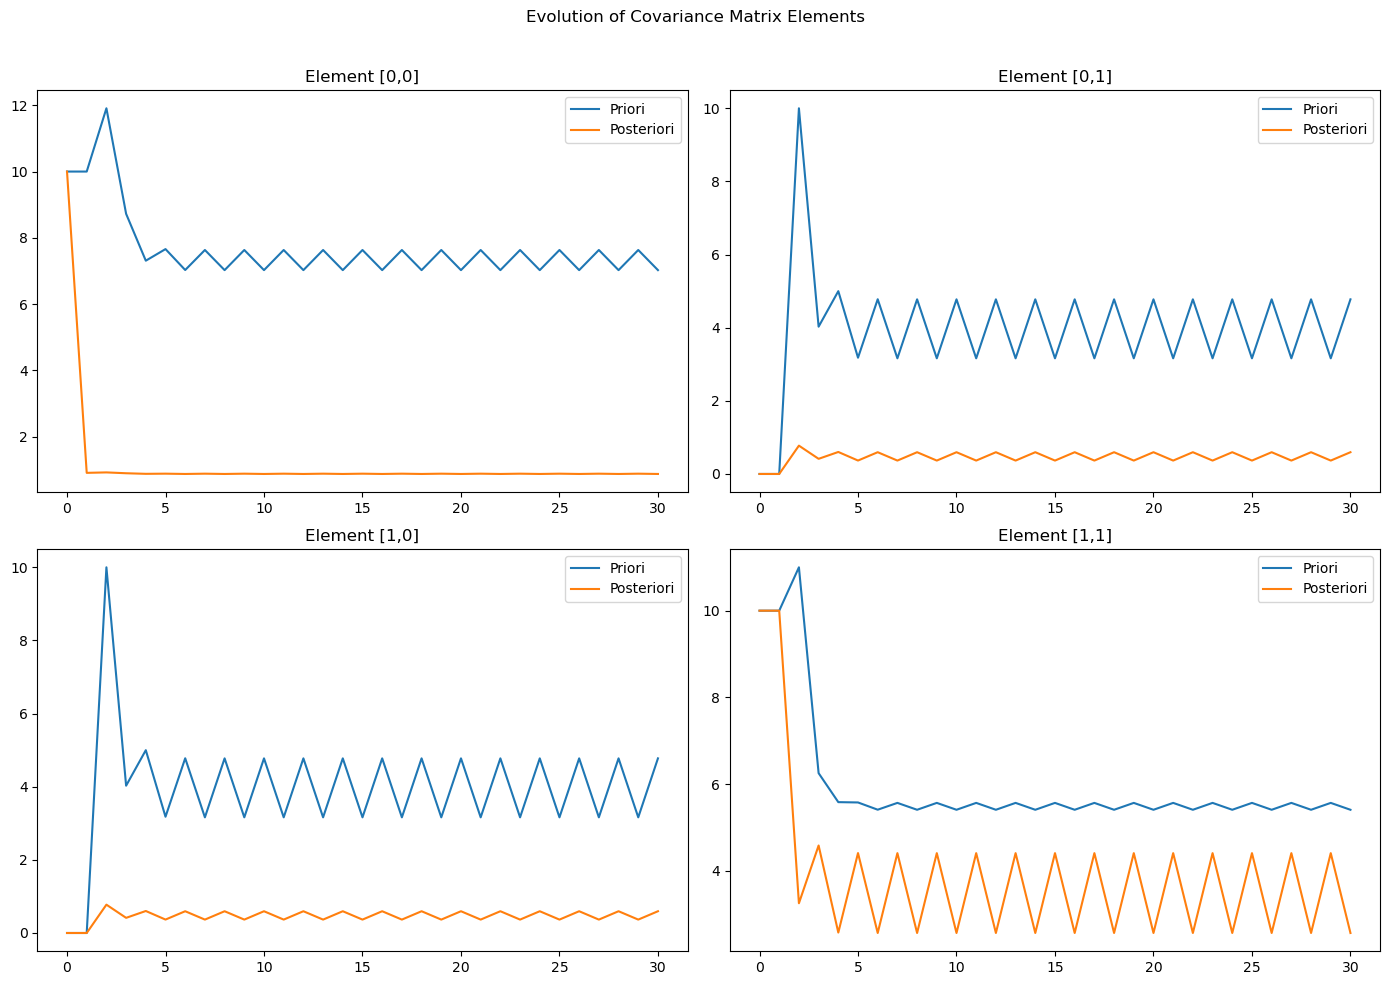

In [232]:
# plotting

# Extract each element from the matrices
priori_00 = np.asarray(priori)[:,0,0]
priori_01 = np.asarray(priori)[:,0,1]
priori_10 = np.asarray(priori)[:,1,0]
priori_11 = np.asarray(priori)[:,1,1]

posteriori_00 = np.asarray(posteriori)[:,0,0]
posteriori_01 = np.asarray(posteriori)[:,0,1]
posteriori_10 = np.asarray(posteriori)[:,1,0]
posteriori_11 = np.asarray(posteriori)[:,1,1]

# Plot
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Evolution of Covariance Matrix Elements")

axes[0, 0].plot(priori_00, label="Priori")
axes[0, 0].plot(posteriori_00, label="Posteriori")
axes[0, 0].set_title("Element [0,0]")
axes[0, 0].legend()

axes[0, 1].plot(priori_01, label="Priori")
axes[0, 1].plot(posteriori_01, label="Posteriori")
axes[0, 1].set_title("Element [0,1]")
axes[0, 1].legend()

axes[1, 0].plot(priori_10, label="Priori")
axes[1, 0].plot(posteriori_10, label="Posteriori")
axes[1, 0].set_title("Element [1,0]")
axes[1, 0].legend()

axes[1, 1].plot(priori_11, label="Priori")
axes[1, 1].plot(posteriori_11, label="Posteriori")
axes[1, 1].set_title("Element [1,1]")
axes[1, 1].legend()

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()
